# 1. 패키지, 모듈, 클래스, 함수 불러오기

In [ ]:
# # klib , missingno 패키지 (EDA 패키지)
# !pip install klib
# !pip install missingno

# # pycaret 패키지
# !pip install -upgrade matplotlib pandas seaborn tqdm requests
# # !pip install pycaret
# !pip install shap awscli azure-storage-blob google-cloud-storage psutil

# # 베이지안 최적화 optuna 패키지
# # !pip install optuna

# # catboost 모델 패키지
# !pip install catboost

# # tensorflow 패키지
# !pip install tensorflow

# # shap 패키지
# !pip install shap

# # 이미지 처리 패키지
# !install Pillow

# !pip install pydot


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -u
     |████████████████████████████████| 564 kB 5.3 MB/s 
     |████████████████████████████████| 3.8 MB 66.7 MB/s 
     |████████████████████████████████| 356 kB 70.8 MB/s 
     |████████████████████████████████| 547 kB 64.5 MB/s 
     |████████████████████████████████| 8.4 MB 63.9 MB/s 
     |████████████████████████████████| 79 kB 7.2 MB/s 
     |████████████████████████████████| 138 kB 74.6 MB/s 
     |████████████████████████████████| 85 kB 3.8 MB/s 
     |████████████████████████████████| 3.6 MB 62.9 MB/s 
     |████████████████████████████████| 178 kB 73.9 MB/s 
     |████████████████████████████████| 41 kB 500 kB/s 
     |████████████████████████

In [ ]:
# Data Wrangling
import pandas as pd
import numpy as np
import pandas_profiling as pp
import gc

# Visualization, EDA
import missingno as msno
import matplotlib.pylab as plt
from matplotlib import font_manager, rc
import seaborn as sns
%matplotlib inline

# Korean font
#font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
#rc('font', family=font_name)

# Preprocessing & Feature Engineering
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import SelectPercentile

# Hyperparameter Optimization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
# import optuna

# Modeling
from lightgbm import LGBMClassifier
# from pycaret.classification import *
from sklearn.dummy import DummyClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
# from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import *
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.base import ClassifierMixin

# Evaluation
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from keras.callbacks import ModelCheckpoint

# Utility
import re
import os
import time
import datetime
import random
import tensorflow as tf
import pickle
import joblib
import platform
import warnings; warnings.filterwarnings("ignore")
from itertools import combinations
from tqdm import tqdm, tqdm_notebook
from IPython.display import Image
from scipy.stats.mstats import gmean
from tensorflow import keras
from PIL import Image

In [ ]:
# 코랩에서만 경로 설정
# from google.colab import drive
# drive.mount('/content/drive')
# path = "/content/drive/MyDrive/ML Competition/input"
# panel = pd.read_csv(path + '/panel.csv', encoding = "utf-8")
# survey = pd.read_csv(path + '/survey.csv', encoding = "utf-8")
# response_train = pd.read_csv(path + '/response_train.csv', encoding = "utf-8")
# response_test = pd.read_csv(path + '/response_test.csv', encoding = "utf-8")
# sub = pd.read_csv(path + "/sample_submission.csv")

Mounted at /content/drive


# 2. 데이터 불러오기

In [ ]:
# 주피터 파일일때(주석처리)
panel = pd.read_csv(os.path.abspath("../input") + '/panel.csv')
survey = pd.read_csv(os.path.abspath("../input") + '/survey.csv')
response_train = pd.read_csv(os.path.abspath("../input") + '/response_train.csv')
response_test = pd.read_csv(os.path.abspath("../input") + '/response_test.csv')

# 성별, 지역 값이 Nan 값인 패널 1명 test에도 존재 하지 않아 그냥 drop
panel.drop(8315, axis=0, inplace=True)
# REGION 컬럼 무의미해서 drop
panel.drop(['REGION'], axis=1, inplace=True)


##### Panel

In [ ]:
# panel조사 분류별 응답율 피처 생성
SQ = ['SQ1', 'SQ2', 'SQ3', 'SQ4', 'SQ5', 'SQ6', 'SQ7', 'SQ8'] # 개인정보
A = ['A1'] # 신규구입/렌트 가전
B = ['B1', 'B2', 'B3', 'B4', 'B5'] # 통신
C = ['C1', 'C2', 'C3'] # 보험/금융
D = ['DQ1', 'DQ2', 'DQ3', 'DQ4', 'DQ5', 'DQ6', 'DQ7'] # 직업
F = ['F1', 'F2'] # 이용마트
H = ['H1'] # 음용주류
T = ['T1'] # 담배
X = ['X1', 'X2', 'X3', 'X4'] # 자동차

panel['SQ_R'] = 1 - panel[SQ].isnull().mean(axis=1)
panel['A_R'] = 1 - panel[A].isnull().mean(axis=1)
panel['B_R'] = 1 - panel[B].isnull().mean(axis=1)
panel['C_R'] = 1 - panel[C].isnull().mean(axis=1)
panel['D_R'] = 1 - panel[D].isnull().mean(axis=1)
panel['F_R'] = 1 - panel[F].isnull().mean(axis=1)
panel['H_R'] = 1 - panel[H].isnull().mean(axis=1)
panel['T_R'] = 1 - panel[T].isnull().mean(axis=1)
panel['X_R'] = 1 - panel[X].isnull().mean(axis=1)
# panel 조사 전체 응답율
panel['ALL_R'] = 1 - panel[SQ+A+B+C+D+F+H+T+X].isnull().mean(axis=1)

In [ ]:
# 결측값 비율이 30% 이하인 column만 사용
features_cols = []
for f in panel.columns:
    if panel[f].isnull().sum()/panel.shape[0] <= 0.3:
        print(f, '\t', panel[f].nunique(), '\t', panel[f].isnull().sum()/panel.shape[0])
        features_cols.append(f)

In [ ]:
# 불필요한 ID들은 제외. SQ1 ~ SQ3는 GENDER, BIRTH, REGION과 중복이어서 제외!
features_cols.remove('userID')
features_cols.remove('SQ1')
features_cols.remove('SQ2')
features_cols.remove('SQ3')

In [ ]:
def handle_profile(x):
    if x != x :
        return 0
    elif x in ['1', '2', '3', '4', '5', '6', '97']:
        return int(x)
    elif x in ['1,', '2,', '3,', '4,', '5,', '6,', '97,']:
        return int(x[0])
    else:
        return 98

panel.SQ4 = panel.SQ4.apply(handle_profile)

In [ ]:
def handle_profile(x):
    if x != x :
        return 0
    elif x in ['1', '2', '3', '4']:
        return int(x)
    elif x in ['1.0', '2.0', '3.0', '4.0']:
        return int(x[0])
    else:
        return 98

panel.SQ5 = panel.SQ5.apply(handle_profile)

In [ ]:
def handle_profile(x):
    if x != x :
        return 0
    elif x in ['1', '2']:
        return int(x)
    elif x in ['1,', '2,']:
        return int(x[0])
    else:
        return 98

panel.SQ6 = panel.SQ6.apply(handle_profile)

In [ ]:
value1 = pd.Series(range(1,17)).apply(lambda x: str(x)).tolist()+['99']
value2 = pd.Series(np.arange(1.0,17.0)).apply(lambda x: str(x)).tolist()+['99.0']
def handle_profile(x):
    if x != x :
        return 0
    elif x in value1:
        return int(x)
    elif x in value2:
        return int(x[0])
    else:
        return 98

panel.SQ7 = panel.SQ7.apply(handle_profile)

In [ ]:
def handle_profile(x):
    if x != x :
        return 0
    elif x in ['1', '2', '3', '4', '5']:
        return int(x)
    elif x in ['1.0', '2.0', '3.0', '4.0', '5.0']:
        return int(x[0])
    else:
        return 98

panel.SQ8 = panel.SQ8.apply(handle_profile)

In [ ]:
values = pd.Series(range(1,23)).apply(lambda x: str(x)).tolist()+['99']
def handle_profile(x):
    if x != x :
        return 0
    elif x in value1:
        return int(x)
    else:
        return 98

panel.A1 = panel.A1.apply(handle_profile)

In [ ]:
def handle_profile(x):    
    if x != x :
        return 0
    elif x in ['1', '1.', '1.']:
        return 2
    elif x in ['2', '3', '2.0', '3.0', '2,', '3,']:
        return 3
    elif x in ['4', '5', '6', '7', '4.0', '5.0', '6.0', '7.0', '4,', '5,', '6,', '7,']:
        return 4
    elif x in ['8', '8.0', '8,']:
        return 5
    else:
        return 99

panel.B1 = panel.B1.apply(handle_profile)

In [ ]:
def handle_profile(x):
    if x != x :
        return 0
    elif x in ['1', '2', '3', '4', '5', '6', '99']:
        return int(x)
    else:
        return 99

panel.B2 = panel.B2.apply(handle_profile)

In [ ]:
def handle_profile(x):    
    if x != x :
        return 0
    elif x in ['1', '2', '3', '4', '5', '6', '7']:
        return int(x)
    elif x in ['1,', '2,', '3,', '4,', '5,', '6,', '7,']:
        return int(x[0])
    elif x in ['99', '99,']:
        return 99
    else:
        return 4  # 기타 제조사

panel.B3 = panel.B3.apply(handle_profile)

In [ ]:
def handle_profile(x):    
    if x != x :
        return 0
    elif x in ['1', '2', '3', '4', '5', '6', '7' , '99', '97']:
        return int(x)
    else:
        return 98

panel.B4 = panel.B4.apply(handle_profile)

In [ ]:
def handle_profile(x):    
    if x != x :
        return 0
    elif x in ['1', '2', '3', '4' ,'5', '6', '7', '8', '9', '10']:
        return int(x)
    elif x in ['1,', '2,', '3,', '4,' ,'5,', '6,', '7,', '8,', '9,', '10,']:
        return int(x[0])
    elif x in ['99', '99,']:
        return 99
    else:
        return 4  # 기타 제조사

panel.B5 = panel.B5.apply(handle_profile)

##### SURVEY

In [ ]:
for f in survey.columns:
    if survey[f].isnull().sum()/survey.shape[0] <= 0.3:
        print(f, '\t', survey[f].nunique(), 'b\t', survey[f].isnull().sum()/survey.shape[0])
        features_cols.append(f)

In [ ]:
features_cols.remove('surveyID')

In [ ]:
# # 대상지역 생성
survey['대상지역'] = np.where(survey['TITLE'].str.contains('해외'), '해외', '기타')
# # 대상자유형
survey['대상자유형'] = '기타'
survey['대상자유형'] = np.where(survey['TITLE'].str.contains('일반인'), '일반인', survey['대상자유형'])
survey['대상자유형'] = np.where(survey['TITLE'].str.contains('소비자'), '소비자', survey['대상자유형'])
features_cols.extend(['대상지역', '대상자유형'])

##### response train/test

In [ ]:
# 날짜/시간 관련 feature 생성
response_train.TIME = response_train.TIME.astype('datetime64')
response_train['MONTH'] = response_train.TIME.dt.month
response_train['DAY'] = response_train.TIME.dt.day
response_train['WEEKDAY'] = response_train.TIME.dt.day_of_week
response_train['HOUR'] = response_train.TIME.dt.hour

response_test.TIME = response_test.TIME.astype('datetime64')
response_test['MONTH'] = response_test.TIME.dt.month
response_test['DAY'] = response_test.TIME.dt.day
response_test['WEEKDAY'] = response_test.TIME.dt.day_of_week
response_test['HOUR'] = response_test.TIME.dt.hour

features_cols.extend(['MONTH', 'DAY', 'HOUR', 'WEEKDAY'])

In [ ]:
train = response_train.merge(panel).merge(survey)
test = response_test.merge(panel).merge(survey).sort_values(by='ID')

##### train/test 저장

In [ ]:
with open(os.path.abspath("../input") + '/01.1.read_data.pkl', 'wb') as f:
    joblib.dump({'train' : train, 'test' : test, 'features_cols':features_cols}, f)

In [ ]:
del train, test, features_cols, response_train, response_test
gc.collect()

#####  train/test LOAD

In [ ]:
with open(os.path.abspath("../input") + '/01.1.read_data.pkl', 'rb') as f:
    pkl_data = joblib.load(f)
locals().update(pkl_data)

# 3. Feature Create

##### (패널 질문 응답수)

In [ ]:
# 패널 질문 COUNT(질문의 성의 판단)
panel_Questions = panel.iloc[:,4:]

panel = panel.iloc[:,:4]
panel_Questions_count = []
for i in range(panel_Questions.shape[0]):
            panel_Questions_count.append(pd.notna(panel_Questions.iloc[i,:].values).sum())

# # 패널 질문 응답수
panel['Questions_count'] = panel_Questions_count

train.merge(panel[["userID","Questions_count"]], how='left')
test.merge(panel[["userID","Questions_count"]], how='left')

,ID,userID,surveyID,TIME,MONTH,DAY,WEEKDAY,HOUR,BIRTH,GENDER,REGION,TYPE,SQ1,SQ2,SQ3,SQ4,SQ5,SQ6,SQ7,SQ8,A1,B1,B2,B3,B4,B5,C1,C2,C3,F1,F2,H1,T1,X1,X2,X3,X4,DQ1,DQ2,DQ3,DQ4,DQ5,DQ6,DQ7,SQ_R,A_R,B_R,C_R,D_R,F_R,H_R,T_R,X_R,ALL_R,TITLE,IR,LOI,CATEGORIES,CPI,대상지역,대상자유형,Questions_count
0,0,p02216,s04629,2021-06-16 12:43:33,6,16,2,12,1979.0,1.0,8.0,D,1.0,1979.0,7.0,1,3,1,9,1,1,4,5,3,1,7,1,2,99,5,99,"1,2","99,,","1,",1.0,"2,",1,8,22,13,1,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.00,1.00000,해외 - 일반인 의견 조사 (G-924872),100,14,NaN,770.0,해외,일반인,32
1,1,p02082,s04629,2021-06-03 12:04:16,6,3,3,12,1998.0,2.0,8.0,D,2.0,1998.0,7.0,5,2,1,9,1,99,4,1,3,5,4,"5,7",9,"1,2,3,5,6,7,9",99,99,"1,3","99,,","99,",99.0,"99,",99,13,"97,편의점 아르바이트",12,"97,파트타이머",1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.00,1.00000,해외 - 일반인 의견 조사 (G-924872),100,14,NaN,770.0,해외,일반인,32
2,2,p02326,s04629,2021-06-16 16:33:04,6,16,2,16,1981.0,1.0,2.0,D,1.0,1981.0,1,1,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.12500,해외 - 일반인 의견 조사 (G-924872),100,14,NaN,770.0,해외,일반인,4
3,3,p02334,s04629,2021-06-16 16:32:34,6,16,2,16,1982.0,1.0,8.0,D,1.0,1982.0,7,1,3,2,99,2,99,4,1,2,99,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.43750,해외 - 일반인 의견 조사 (G-924872),100,14,NaN,770.0,해외,일반인,14
4,4,p06287,s04629,2021-06-03 12:02:16,6,3,3,12,1999.0,1.0,32.0,B,1.0,1999.0,5,1,2,1,99,4,98,4,1,99,98,1,1,9,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.000000,0.0,0.0,0.0,0.00,0.53125,해외 - 일반인 의견 조사 (G-924872),100,14,NaN,770.0,해외,일반인,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1355512,1355512,p13243,s05675,2021-09-12 09:44:07,9,12,6,9,1995.0,1.0,2.0,B,1.0,1995.0,1.0,4,3,1,99,4,98,4,3,3,98,8,99,"8,",6,"5,","99,","2,1,3,11,4",16,2,2.0,"3,",1.0,4,8,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.285714,1.0,1.0,1.0,1.00,0.84375,해외 - 일반인 의견 조사 (G-992341),100,16,NaN,880.0,해외,일반인,27
1355513,1355513,p13644,s05597,2021-09-05 07:04:40,9,5,6,7,1981.0,2.0,512.0,C,2.0,1980.0,8.0,1,3,2,3,98,1,3,99,2,98,4,2,2,"1,2,3,4,5",99,99,99,99,8,6.0,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.000000,1.0,1.0,1.0,0.75,0.75000,해외 - 일반인 의견 조사 (G-987381),100,16,NaN,880.0,해외,일반인,24
1355514,1355514,p15308,s05597,2021-09-05 02:34:38,9,5,6,2,1984.0,2.0,2.0,C,2.0,1984.0,1.0,1,4,1,3,98,4,3,1,3,2,4,5,99,"1,2,3,4,9",99,15,1,1,9,5.0,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.000000,1.0,1.0,1.0,0.75,0.75000,해외 - 일반인 의견 조사 (G-987381),100,16,NaN,880.0,해외,일반인,24
1355515,1355515,p13465,s05868,2021-10-05 00:30:49,10,5,1,0,1987.0,1.0,256.0,C,1.0,1987.0,2.0,1,3,1,3,98,5,3,99,3,2,4,3,99,"1,2,3,4",16,99,99,99,99,19.0,3,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.000000,1.0,1.0,1.0,1.00,0.78125,해외 - 일반인 의견 조사 (G-1007403),100,16,NaN,880.0,해외,일반인,25


In [ ]:
del survey, panel, response_train, response_test
gc.collect()

201

##### (패널 ID별 누적 포인트)

In [ ]:
# 패널 ID 별 획득 누적 포인트
Points_earned = pd.DataFrame(train.query('STATUS==1').groupby('userID')['CPI'].agg([('Points_earned',np.sum)])).reset_index()

# 패널 ID 별 획득 평균 포인트
Points_earned_mean = pd.DataFrame(train.query('STATUS==1').groupby('userID')['CPI'].agg([('Points_earned_mean',np.mean)])).reset_index()

train = train.merge(Points_earned, how='left')
train = train.merge(Points_earned_mean, how='left')

train['Points_earned'].fillna(0, inplace = True)
train['Points_earned_mean'].fillna(0, inplace = True)

test = test.merge(Points_earned, how='left')
test = test.merge(Points_earned_mean, how='left')

test['Points_earned'].fillna(0, inplace = True) 
test['Points_earned_mean'].fillna(0, inplace = True)

##### (TITLE / CATEGORIES 빈도수)

In [ ]:
# [^ ㄱ-ㅣ가-힣+]정규 표현식

train["TITLE_CNT"]=0
test["TITLE_CNT"]=0
word_counts = {}
def count_word(x):
    if x['STATUS'] == 1:
        for w in re.sub(r'[^ ㄱ-ㅣ가-힣+]', '', x['TITLE']).split():
            word_counts[w] = word_counts.get(w, 0) + 1
def score_word(x):
    score = 0
    for w in re.sub(r'[^ ㄱ-ㅣ가-힣+]', '', x['TITLE']).split():
        score += word_counts.get(w, 0)
    return score    
            
train.apply(count_word, axis=1)
train.TITLE_CNT = train.apply(score_word, axis=1)
test.TITLE_CNT = test.apply(score_word, axis=1)

In [ ]:
train["CATEGORIES_CNT"]=0
test["CATEGORIES_CNT"]=0

train["CATEGORIES"]=train["CATEGORIES"].fillna("unknown")
test["CATEGORIES"]=test["CATEGORIES"].fillna("unknown")
word_counts = {}
def count_word(x):
    if x['STATUS'] == 1:
        for w in re.sub(r'[^a-zA-Z]', '', x['CATEGORIES']).split():
            word_counts[w] = word_counts.get(w, 0) + 1
def score_word(x):
    score = 0
    for w in re.sub(r'[^a-zA-Z]', '', x['CATEGORIES']).split():
        score += word_counts.get(w, 0)
    return score    
            
train.apply(count_word, axis=1)
train.CATEGORIES_CNT = train.apply(score_word, axis=1)
test.CATEGORIES_CNT = test.apply(score_word, axis=1)


##### IR 별 응답확률

In [ ]:
train_IR = ((train.groupby('IR')['STATUS'].sum())/(train.IR.value_counts().sort_index())).reset_index().rename(columns = {0 : 'STATUS_ratio_IR'})
train = train.merge(train_IR,how='left')
test = test.merge(train_IR,how='left')
test.STATUS_ratio_IR=test.STATUS_ratio_IR.fillna(test.STATUS_ratio_IR.mean())

##### LOI별 응답확률

In [ ]:
train_LOI = ((train.groupby('LOI')['STATUS'].sum())/(train.LOI.value_counts().sort_index())).reset_index().rename(columns = {0 : 'STATUS_ratio_LOI'})
train = train.merge(train_LOI,how='left')
test = test.merge(train_LOI,how='left')
test.STATUS_ratio_LOI=test.STATUS_ratio_LOI.fillna(test.STATUS_ratio_LOI.mean())

##### CPI 별 응답확률

In [ ]:
train_CPI = ((train.groupby('CPI')['STATUS'].sum())/(train.CPI.value_counts().sort_index())).reset_index().rename(columns = {0 : 'STATUS_ratio_CPI'})
train = train.merge(train_CPI,how='left')
test = test.merge(train_CPI,how='left')
test.STATUS_ratio_CPI=test.STATUS_ratio_CPI.fillna(test.STATUS_ratio_CPI.mean())

##### (TYPE 별 응답확률)

In [ ]:
TYPE_mean = pd.DataFrame(train.groupby('TYPE')['STATUS'].agg([('TYPE_mean',np.mean)])).reset_index()
train = train.merge(TYPE_mean, how='left')
test = test.merge(TYPE_mean, how='left')

##### 최근3개월간응답확률

In [ ]:
# 최근 3개월 응답율
response = train[train['TIME'] >= train.TIME.sort_values().iloc[-1] - pd.DateOffset(months=1)].groupby('userID')['STATUS'].agg([
    ('RES_RATE_3M', lambda x: np.mean(x))
]).reset_index()
train = train.merge(response, how='left')
test = pd.merge(test, response, how='left')

##### 요일별응답확률

In [ ]:
for w in np.arange(0,7):
    response = train[train['WEEKDAY']==w].groupby('userID')['STATUS'].agg([
        (f'WEEKDAY{w}_RES_RATE', lambda x: np.mean(x))
    ]).reset_index()
    train = train.merge(response, how='left')
    test = test.merge(response, how='left')

##### 시간대별응답확률

In [ ]:
HOURCLS_train_0 = (train['HOUR']>=7) & (train['HOUR']<13) # 오전
HOURCLS_train_1 = (train['HOUR']>=13) & (train['HOUR']<19) # 오후
HOURCLS_train_2 = (train['HOUR']>=19) & (train['HOUR']<24) # 저녁
HOURCLS_train_3 = (train['HOUR']>=0) & (train['HOUR']<7) # 야간

train['HOURCLS'] = 0
train['HOURCLS'] = np.where(HOURCLS_train_0, 0, train['HOURCLS'])
train['HOURCLS'] = np.where(HOURCLS_train_1, 1, train['HOURCLS'])
train['HOURCLS'] = np.where(HOURCLS_train_2, 2, train['HOURCLS'])
train['HOURCLS'] = np.where(HOURCLS_train_3, 3, train['HOURCLS'])

HOURCLS_test_0 = (test['HOUR']>=7) & (test['HOUR']<13) # 오전
HOURCLS_test_1 = (test['HOUR']>=13) & (test['HOUR']<19) # 오후
HOURCLS_test_2 = (test['HOUR']>=19) & (test['HOUR']<24) # 저녁
HOURCLS_test_3 = (test['HOUR']>=0) & (test['HOUR']<7) # 야간

test['HOURCLS'] = 0
test['HOURCLS'] = np.where(HOURCLS_test_0, 0, test['HOURCLS'])
test['HOURCLS'] = np.where(HOURCLS_test_1, 1, test['HOURCLS'])
test['HOURCLS'] = np.where(HOURCLS_test_2, 2, test['HOURCLS'])
test['HOURCLS'] = np.where(HOURCLS_test_3, 3, test['HOURCLS'])

i=0
for cd in [0,1,2,3]:
    response = train[train['HOURCLS']==i].groupby('userID')['STATUS'].agg([
        (f'HOURCLS{i}_RES_RATE', lambda x: np.mean(x))
    ]).reset_index()
    train = train.merge(response, how='left')
    test = test.merge(response, how='left')
    i=i+1

##### (유저 아이디 별 응답확률)

In [ ]:
respond = train.query('STATUS == 1').groupby('userID')['userID'].agg([('respond',np.size)]).reset_index()
total = train.groupby('userID')['userID'].agg([('total',np.size)]).reset_index()

train = train.merge(respond).merge(total)

train['Response_Probability'] = train['respond'] / train['total']
test = pd.merge(test, train.drop_duplicates(subset=['userID'])[['userID', 'Response_Probability']], how='left')
test['Response_Probability'] = test['Response_Probability'].fillna(0) 

del train['respond'], train['total']

##### 시간별 응답확률

In [ ]:
hour_mean = train.groupby("HOUR").STATUS.mean()
train["STATUS_ratio_hour"] = train["HOUR"].map(dict(hour_mean))
test["STATUS_ratio_hour"] = test["HOUR"].map(dict(hour_mean))

##### 유저아이디별 응답횟수

In [ ]:
res_cnt = train[train.STATUS== 1].groupby("userID").surveyID.count()
train["res_cnt"] = train["userID"].map(dict(res_cnt))
test["res_cnt"] = test["userID"].map(dict(res_cnt))

test["res_cnt"] = test["res_cnt"].fillna(0)

##### CATEGORIES Label encoding

In [ ]:
# CATEGORIES Label Encoding
encoder = LabelEncoder()

# X_train데이터를 이용 피팅하고 라벨숫자로 변환한다
encoder.fit(train["CATEGORIES"])
train_encoded_cat = encoder.transform(train["CATEGORIES"])

# X_test데이터에만 존재하는 새로 출현한 데이터를 신규 클래스로 추가한다 
for label in np.unique(test["CATEGORIES"]):
    if label not in encoder.classes_: # unseen label 데이터인 경우( )
        encoder.classes_ = np.append(encoder.classes_, label) # 미처리 시 ValueError발생
test_encoded_cat = encoder.transform(test["CATEGORIES"])

train["CATEGORIES"] = pd.DataFrame(train_encoded_cat)
test["CATEGORIES"] = pd.DataFrame(test_encoded_cat)

del train_encoded_cat, test_encoded_cat

#####요일별 응답확률

In [ ]:
weekday_mean = train.groupby("WEEKDAY").STATUS.mean()
train["weekday_mean"] = train["WEEKDAY"].map(dict(weekday_mean))
test["weekday_mean"] = test["WEEKDAY"].map(dict(weekday_mean))

#####성별응답확률

In [ ]:
res_freq = train.query('STATUS == 1').groupby('GENDER')['IR'].agg([('g_i','mean')]).reset_index()
train = pd.merge(train, res_freq, how='left')
test = pd.merge(test, res_freq, how='left')
test.FREQ = test.g_i.fillna(test.g_i.mean())

##### 생년 -> 나이로

In [ ]:
train["AGE"] = 2022- train["BIRTH"]
test["AGE"] = 2022- test["BIRTH"]

# 4. Feature Engineering

##### 무의미한 feature 삭제

In [ ]:
train.drop(columns = ['SQ1',"SQ2","SQ3",'C1', 'C2', 'C3', 'F1', 'F2',
       'H1', 'T1', 'X1', 'X2', 'X3', 'X4', 'DQ1', 'DQ2', 'DQ3', 'DQ4', 'DQ5',
       'DQ6', 'DQ7',"BIRTH","REGION","TITLE"],inplace=True)
test.drop(columns = ['SQ1',"SQ2","SQ3",'C1', 'C2', 'C3', 'F1', 'F2',
       'H1', 'T1', 'X1', 'X2', 'X3', 'X4', 'DQ1', 'DQ2', 'DQ3', 'DQ4', 'DQ5',
       'DQ6', 'DQ7',"BIRTH","REGION","TITLE"],inplace=True)

##### data 저장

In [ ]:
#   저장
with open(os.path.abspath("../input") + '/01.2.read_data.pkl', 'wb') as f:
    joblib.dump({'train' : train, 'test' : test, 'y_train':y_train}, f)

##### data LOAD

In [ ]:
#   열기
with open(os.path.abspath("../input") + '/01.2.read_data.pkl', 'rb') as f:
    pkl_data = joblib.load(f)
locals().update(pkl_data)

##### 2021년 2월 20 일 데이터만 사용

In [ ]:
train = train[train.TIME >= "2021-02-20 00:00:00"]

In [ ]:
y_train = train['STATUS']
train.drop(['STATUS','userID', 'surveyID',"TIME"], axis=1, inplace=True)

test_id = test.iloc[:,0:1]
test.drop(['ID','userID', 'surveyID',"TIME"], axis=1, inplace=True)

##### Feature 전처리

In [ ]:
# 데이터 전처리를 위한 train+test feature 생성
features = pd.concat([train,test]).reset_index(drop=True)

#성능 개선에 무의미한 Feature 제거
features.drop(columns = ["대상자유형","대상지역"], inplace=True)

In [ ]:
num_features = ['MONTH', 'DAY', 
       'HOUR','SQ_R', 'A_R', 'B_R', 'C_R', 'D_R','WEEKDAY','SQ8','B1','SQ6',
       'F_R', 'H_R', 'T_R', 'X_R', 'ALL_R', 'IR', 'LOI','SQ7','SQ5','A1','B2','B4','B5','SQ4','B3','CATEGORIES',
       'CPI',  'Points_earned', 'Points_earned_mean',
       'TITLE_CNT', 'CATEGORIES_CNT', 'STATUS_ratio_IR', 'STATUS_ratio_LOI',
       'STATUS_ratio_CPI', 'TYPE_mean', 'RES_RATE_3M', 'WEEKDAY0_RES_RATE',
       'WEEKDAY1_RES_RATE', 'WEEKDAY2_RES_RATE', 'WEEKDAY3_RES_RATE',
       'WEEKDAY4_RES_RATE', 'WEEKDAY5_RES_RATE', 'WEEKDAY6_RES_RATE',
       'HOURCLS', 'HOURCLS0_RES_RATE', 'HOURCLS1_RES_RATE',
       'HOURCLS2_RES_RATE', 'HOURCLS3_RES_RATE', 'Response_Probability',
       'STATUS_ratio_hour', 'res_cnt', 'weekday_mean', 'g_i', 'AGE']

cat_features = ['GENDER','TYPE']

In [ ]:
# 범주형 변수는 가장 많이 나온 값으로 채움
apply_most_frequent_features = cat_features 
features[apply_most_frequent_features] = SimpleImputer(strategy='most_frequent').\
fit_transform(features[apply_most_frequent_features])

In [ ]:
# num feature 중 0으로 채울 대상
apply_zero_features = ['SQ_R', 'A_R', 'B_R', 'C_R', 'D_R', 'F_R', 'H_R', 'T_R', 'X_R', 'ALL_R',
                       'RES_RATE_3M', 'WEEKDAY0_RES_RATE', 'WEEKDAY1_RES_RATE', 'WEEKDAY2_RES_RATE', 'WEEKDAY3_RES_RATE',
                       'WEEKDAY4_RES_RATE', 'WEEKDAY5_RES_RATE', 'WEEKDAY6_RES_RATE',
                       'HOURCLS0_RES_RATE', 'HOURCLS1_RES_RATE', 'HOURCLS2_RES_RATE', 'HOURCLS3_RES_RATE'                       
                      ]
features[apply_zero_features] = SimpleImputer(strategy='constant', fill_value=0).\
fit_transform(features[apply_zero_features])

In [ ]:
# 응답율 추이 변수 추가
features['RES_RATE_TREND'] = (features['RES_RATE_3M'] - features['Response_Probability'])

features[['RES_RATE_TREND']] = SimpleImputer(strategy='constant', fill_value=0).\
fit_transform(features[['RES_RATE_TREND']])

In [ ]:
# mean 값 채우기
apply_mean_features = list(set(num_features) - set(apply_zero_features))
features[apply_mean_features] = SimpleImputer(strategy='mean').\
fit_transform(features[apply_mean_features])

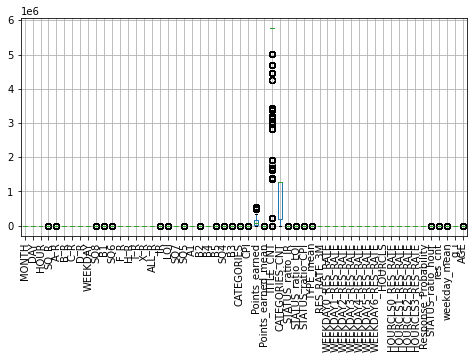

In [ ]:
# 이상치 제거 전 수치형 변수 시각화
plt.figure(figsize = (8, 4))
features[num_features].boxplot()
plt.xticks(fontsize = 10, rotation = 90)
plt.show()

In [ ]:
# 수치형 변수 이상치 제거
features[num_features] = features[num_features].apply(lambda x: x.clip(x.quantile(.05), x.quantile(.95)), axis=0)

# 이상치 제거 후 수치형 변수 시각화
plt.figure(figsize = (8, 4))
features[num].boxplot()
plt.xticks(fontsize = 10, rotation = 90)
plt.show()

In [ ]:
#StandardScaler
from sklearn.preprocessing import StandardScaler

# # 스케일링 전 train, test 분할
X_train = features.iloc[:y_train.shape[0], :]
X_test = features.iloc[y_train.shape[0]:, :]

scaler = StandardScaler()
X_train[num_features] = scaler.fit_transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])

In [ ]:
# 원핫 인코딩
df_encoded = pd.get_dummies(pd.concat([X_train, X_test]), columns=cat_features)
X_train = df_encoded[:X_train.shape[0]]
X_test = df_encoded[X_train.shape[0]:]

# 5. 피쳐 셀렉션

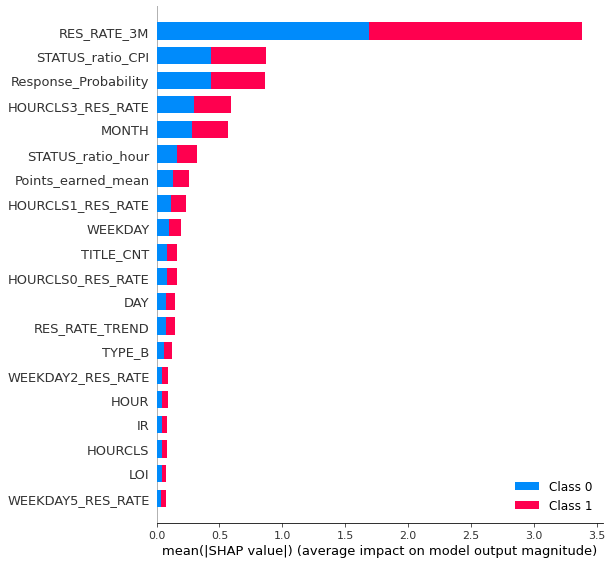

,column_name,shap_importance
37,RES_RATE_3M,1.6891
35,STATUS_ratio_CPI,0.434257
50,Response_Probability,0.428897
49,HOURCLS3_RES_RATE,0.293987
0,MONTH,0.281806
...,...,...
21,H_R,0
16,A_R,0
17,B_R,0
24,ALL_R,0


In [ ]:
# Method: Using SHAP values 
import shap
from lightgbm import LGBMClassifier

# DF, based on which importance is checked
X_importance = X_test

# Explain model predictions using shap library:
model = LGBMClassifier(random_state=0).fit(X_train, y_train)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_importance)

# Plot summary_plot as barplot:
shap.summary_plot(shap_values, X_importance, plot_type='bar')

shap_sum = np.abs(shap_values).mean(axis=1)[1,:]
importance_df = pd.DataFrame([X_importance.columns.tolist(), shap_sum.tolist()]).T
importance_df.columns = ['column_name', 'shap_importance']
importance_df = importance_df.sort_values('shap_importance', ascending=False)
importance_df

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(X_train.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [ ]:
# feature 중요도가 0 이상
SHAP_THRESHOLD = 0
features_selected = importance_df.query('shap_importance > @SHAP_THRESHOLD').column_name.tolist()
X_train = X_train[features_selected]
X_test = X_test[features_selected]
print(X_train.shape)

(1169378, 52)


# LGBM OOF

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
kf = KFold(n_splits = 5, shuffle = True, random_state = 0)

model = LGBMClassifier(random_state = 44)
lgbm_pred = np.zeros((X_test.shape[0]))
auc_list = []
for tr_idx, val_idx in kf.split(X_train, y_train):
    tr_x, tr_y = X_train.iloc[tr_idx], y_train.iloc[tr_idx]
    val_x, val_y = X_train.iloc[val_idx], y_train.iloc[val_idx]
    
    model.fit(tr_x, tr_y)
    pred = model.predict_proba(val_x)[:, 1]

    auc = roc_auc_score(val_y, pred)
    auc_list.append(auc)
    
    sub_pred = np.array(model.predict_proba(X_test)[:, 1]) / 5
    lgbm_pred += sub_pred
print(f'{model.__class__.__name__}의 5fold 평균 AUC는 {np.mean(auc_list)}')


calibrated_clf = CalibratedClassifierCV(model, method='isotonic', cv=5)
calibrated_clf.fit(train_df[v1], train_df['label'])


LGBMClassifier의 5fold 평균 AUC는 0.9382645328141738


In [ ]:
sub["STATUS"] = lgbm_pred
sub.to_csv(os.path.abspath("../submissions") + "/.csv", index = False)

### LR OOF

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
kf = KFold(n_splits = 5, shuffle = True, random_state = 0)

model = LogisticRegression(random_state = 44)
lr_pred = np.zeros((X_test.shape[0]))
auc_list = []
for tr_idx, val_idx in kf.split(X_train, y_train):
    tr_x, tr_y = X_train.iloc[tr_idx], y_train.iloc[tr_idx]
    val_x, val_y = X_train.iloc[val_idx], y_train.iloc[val_idx]
    
    model.fit(tr_x, tr_y)
    pred = model.predict_proba(val_x)[:, 1]

    auc = roc_auc_score(val_y, pred)
    auc_list.append(auc)
    
    sub_pred = np.array(model.predict_proba(X_test)[:, 1]) / 5
    lr_pred += sub_pred
print(f'{model.__class__.__name__}의 5fold 평균 AUC는 {np.mean(auc_list)}')


LogisticRegression의 5fold 평균 AUC는 0.9104398786463891


In [ ]:
sub["STATUS"] = lr_pred
sub.to_csv(os.path.abspath("../submissions") + "/.csv", index = False)

# CatBoost OOF

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
kf = KFold(n_splits = 5, shuffle = True, random_state = 0)

model = CatBoostClassifier(random_state = 44)
cat_pred = np.zeros((X_test.shape[0]))
auc_list = []
for tr_idx, val_idx in kf.split(X_train, y_train):
    tr_x, tr_y = X_train.iloc[tr_idx], y_train.iloc[tr_idx]
    val_x, val_y = X_train.iloc[val_idx], y_train.iloc[val_idx]
    
    model.fit(tr_x, tr_y)
    pred = model.predict_proba(val_x)[:, 1]

    auc = roc_auc_score(val_y, pred)
    auc_list.append(auc)
    
    sub_pred = np.array(model.predict_proba(X_test)[:, 1]) / 5
    cat_pred += sub_pred
print(f'{model.__class__.__name__}의 5fold 평균 AUC는 {np.mean(auc_list)}')


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
5:	learn: 0.3845901	total: 373ms	remaining: 1m 1s
6:	learn: 0.3759979	total: 426ms	remaining: 1m
7:	learn: 0.3695565	total: 475ms	remaining: 59s
8:	learn: 0.3656935	total: 521ms	remaining: 57.4s
9:	learn: 0.3623626	total: 576ms	remaining: 57s
10:	learn: 0.3587492	total: 621ms	remaining: 55.8s
11:	learn: 0.3559633	total: 667ms	remaining: 54.9s
12:	learn: 0.3528455	total: 722ms	remaining: 54.8s
13:	learn: 0.3509562	total: 768ms	remaining: 54.1s
14:	learn: 0.3491715	total: 809ms	remaining: 53.1s
15:	learn: 0.3474167	total: 857ms	remaining: 52.7s
16:	learn: 0.3462393	total: 902ms	remaining: 52.2s
17:	learn: 0.3443120	total: 950ms	remaining: 51.8s
18:	learn: 0.3431545	total: 994ms	remaining: 51.3s
19:	learn: 0.3423525	total: 1.04s	remaining: 50.9s
20:	learn: 0.3409503	total: 1.09s	remaining: 50.7s
21:	learn: 0.3400771	total: 1.14s	remaining: 50.6s
22:	learn: 0.3393416	total: 1.19s	remaining: 50.5s
23:	learn: 0.3382766	total: 1.23s	remaining: 50.2s
24:	lea

In [ ]:
sub["STATUS"] = cat_pred
sub.to_csv(os.path.abspath("../submissions") + "/.csv", index = False)

### ADABoost OOF

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
kf = KFold(n_splits = 5, shuffle = True, random_state = 0)

model = AdaBoostClassifier(random_state = 44)
ada_pred = np.zeros((X_test.shape[0]))
auc_list = []
for tr_idx, val_idx in kf.split(X_train, y_train):
    tr_x, tr_y = X_train.iloc[tr_idx], y_train.iloc[tr_idx]
    val_x, val_y = X_train.iloc[val_idx], y_train.iloc[val_idx]
    
    model.fit(tr_x, tr_y)
    pred = model.predict_proba(val_x)[:, 1]

    auc = roc_auc_score(val_y, pred)
    auc_list.append(auc)
    
    sub_pred = np.array(model.predict_proba(X_test)[:, 1]) / 5
    ada_pred += sub_pred
print(f'{model.__class__.__name__}의 5fold 평균 AUC는 {np.mean(auc_list)}')

AdaBoostClassifier의 5fold 평균 AUC는 0.9141161295397024


In [ ]:
sub["STATUS"] = ada_pred
sub.to_csv(os.path.abspath("../submissions") + "/.csv", index = False)

# RF OOF

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
kf = KFold(n_splits = 5, shuffle = True, random_state = 0)

model = RandomForestClassifier(random_state = 44)
rf_pred = np.zeros((X_test.shape[0]))
auc_list = []
for tr_idx, val_idx in kf.split(X_train, y_train):
    tr_x, tr_y = X_train.iloc[tr_idx], y_train.iloc[tr_idx]
    val_x, val_y = X_train.iloc[val_idx], y_train.iloc[val_idx]
    
    model.fit(tr_x, tr_y)
    pred = model.predict_proba(val_x)[:, 1]

    auc = roc_auc_score(val_y, pred)
    auc_list.append(auc)
    
    sub_pred = np.array(model.predict_proba(X_test)[:, 1]) / 5
    rf_pred += sub_pred
print(f'{model.__class__.__name__}의 5fold 평균 AUC는 {np.mean(auc_list)}')


RandomForestClassifier의 5fold 평균 AUC는 0.9373208105356511


In [ ]:
sub["STATUS"] = rf_pred 
sub.to_csv(os.path.abspath("../submissions") + "/.csv", index = False)

In [ ]:
sub["STATUS"] = (cat_pred + rf_pred)/2
sub.to_csv(os.path.abspath("../submissions") + "/cat_rf_addprofessor.csv", index = False)

# submission ensemble

In [ ]:
sub_1 = pd.read_csv(os.path.abspath("../submissions") + '/best_all_train_feb20.csv')
sub_2 = pd.read_csv(os.path.abspath("../submissions") + '/best_all_train_feb10.csv')

In [ ]:
final_sub = (sub_1 * 0.7) + (sub_2 * 0.3)
pd.DataFrame({'ID': test_id["ID"], 'STATUS': final_sub["STATUS"]}).to_csv(os.path.abspath("../submissions") + "/feb10+feb20_ensemble.csv", index=False)